**Data Exploration and Preprocessing**

In [1]:
import pandas as pd
df=pd.read_csv('/content/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
for i in df.select_dtypes(include=['int64','float64']).columns:
  df[i].fillna(df[i].mean(),inplace=True)
for i in df.select_dtypes(include=['object']).columns:
  df[i].fillna(df[i].mode()[0],inplace=True)
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

numerical_columns=df.select_dtypes(include=['int64','float64']).columns

#Standard scaling
standard_scaler=StandardScaler()
df_standard_scaled=df.copy()
df_standard_scaled[numerical_columns]=standard_scaler.fit_transform(df[numerical_columns])

#Min-Max scaling
min_max_scaler=MinMaxScaler()
df_min_max_scaled=df.copy()
df_min_max_scaled[numerical_columns]=min_max_scaler.fit_transform(df[numerical_columns])

# Displaying the first few rows of the scaled dataframes
print("Standard Scaled Data")
print(df_standard_scaled.head())

print("\nMin-Max scaled data")
print(df_min_max_scaled.head())

Standard Scaled Data
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0    

Standard Scaling:

Scenario: When the data follows a normal distribution.

Reason: Standard Scaling centers the data around the mean with a standard deviation of 1. This is useful when the features have different units and scales, but you expect them to have similar distributions.

Min-Max Scaling:

Scenario: When you need the data to be within a specific range, such as [0, 1].

Reason: Min-Max Scaling preserves the relationships between data points by transforming the data linearly within the specified range. It's useful when the algorithm requires bounded input features or when you need to prevent domination by features with larger ranges.

**Encoding Techniques**

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

categorical_columns=df.select_dtypes(include=['object']).columns

one_hot_encoder=OneHotEncoder()
label_encoder=LabelEncoder()

for i in categorical_columns:
  unique_values=df[i].nunique()

  if unique_values< 5:
    #Apply one hot coding
    one_hot_encoded=one_hot_encoder.fit_transform(df[[i]])
    one_hot_encoded_df=pd.DataFrame(one_hot_encoded, columns=[f"{i}_{category}" for category in one_hot_encoder.categories_[0][1:]], index=df.index)
    df=pd.concat([df,one_hot_encoded_df],axis=1).drop(i,axis=1)
  else:
    # Apply Label Encoding
    df[i]=label_encoder.fit_transform(df[i])

print(df.head())


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country      sex_ Male   income_ >50K  
0              39    (0, 1)\t1.0    

**One-Hot Encoding:**

One-Hot Encoding creates binary columns for each category of the categorical variable.
We drop the first category to avoid multicollinearity (the drop='first' parameter).

**Label Encoding:**

Label Encoding assigns an integer to each category of the categorical variable.
This is suitable for variables with a large number of categories.

**One-Hot Encoding**

**Pros:**

No Ordinal Relationship: One-Hot Encoding doesn't assume any ordinal relationship between the categories.
Model Compatibility: Suitable for algorithms that don't handle categorical data natively and require numeric input.

**Cons:**

High Dimensionality: Increases the number of features, which can lead to the curse of dimensionality, especially with high cardinality categorical variables.
Sparse Matrix: Results in a sparse matrix which can be inefficient for storage and computation.

**Label Encoding**

**Pros:**
Efficiency: More memory efficient as it represents categories with integers.
Simplicity: Easy to implement and understand.

**Cons:**

Ordinal Relationship Assumption: Implies an ordinal relationship between categories, which may not be appropriate for all categorical variables.

Model Bias: Can introduce bias in certain algorithms (e.g., linear models) because the numeric values imply a ranking.

**Feature Engineering**

Feature 1: Age Group

Rationale: Age is an important factor that could influence income. Creating age groups can help capture the non-linear relationship between age and income.

Feature 2: Work Hours per Week Category

Rationale: The number of hours worked per week could be a significant factor in determining income. Categorizing work hours can help capture patterns related to part-time, full-time, and overtime work.

In [9]:
# Create new feature: Age Group
df['age_group']=pd.cut(df['age'],bins=[0,25,45,65,100],labels=['Young','Adult','Senior','Elder'])

# Create new feature: Work Hours per Week Category
df['work_hours_category']=pd.cut(df['hours_per_week'],bins=[0,20,40,60,100],labels=['Part-time','Full-time','Overtime','Extreme'])

print(df[['age', 'age_group', 'hours_per_week', 'work_hours_category']].head())

   age age_group  hours_per_week work_hours_category
0   39     Adult              40           Full-time
1   50    Senior              13           Part-time
2   38     Adult              40           Full-time
3   53    Senior              40           Full-time
4   28     Adult              40           Full-time


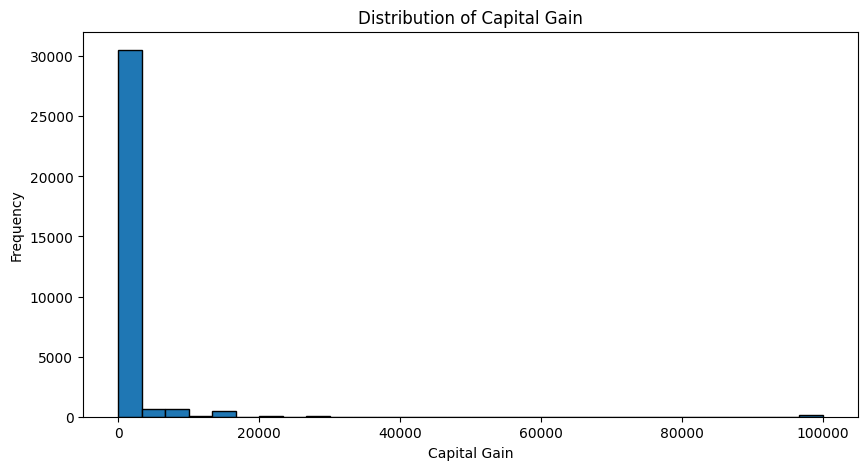

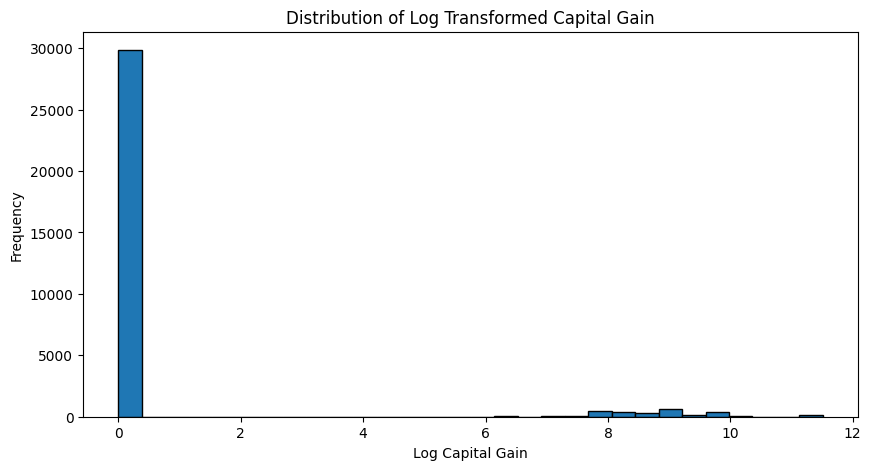

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Check the distribution of the capital_gain feature
plt.figure(figsize=(10,5))
plt.hist(df['capital_gain'],bins=30,edgecolor='black')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation to the capital_gain feature
df['capital_gain_log']=np.log1p(df['capital_gain'])
# Use log1p to handle zero values

# Check the distribution of the transformed capital_gain feature
plt.figure(figsize=(10, 5))
plt.hist(df['capital_gain_log'], bins=30, edgecolor='black')
plt.title('Distribution of Log Transformed Capital Gain')
plt.xlabel('Log Capital Gain')
plt.ylabel('Frequency')
plt.show()

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Male',
       'income_ >50K', 'age_group', 'work_hours_category', 'capital_gain_log'],
      dtype='object')

In [12]:
!pip install ppscore

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import seaborn as sns
import ppscore as pps

#Ensure the dataset is properly preprocessed before using Isolation Forest
df_cleaned = df.copy()  # Copy the dataframe to apply Isolation Forest

# Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df_cleaned[numerical_columns])

# Remove outliers
df_cleaned = df_cleaned[outliers == 1]
print(f"Original shape: {df.shape}")
print(f"New shape after outlier removal: {df_cleaned.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original shape: (32561, 18)
New shape after outlier removal: (29305, 18)


In [14]:
# PPS (Predictive Power Score)
selected_features = numerical_columns[:10]  # Adjust the number of features as needed
pps_matrix = pps.matrix(df_cleaned[selected_features])

# Display top 10 relationships
print(pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10))

                 x               y   ppscore
0              age             age  1.000000
7           fnlwgt          fnlwgt  1.000000
28    capital_loss    capital_loss  1.000000
21    capital_gain    capital_gain  1.000000
14   education_num   education_num  1.000000
35  hours_per_week  hours_per_week  1.000000
12   education_num             age  0.014682
30  hours_per_week             age  0.012103
6           fnlwgt             age  0.000000
22    capital_gain    capital_loss  0.000000


<ipython-input-15-0ffd62c11c96>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')


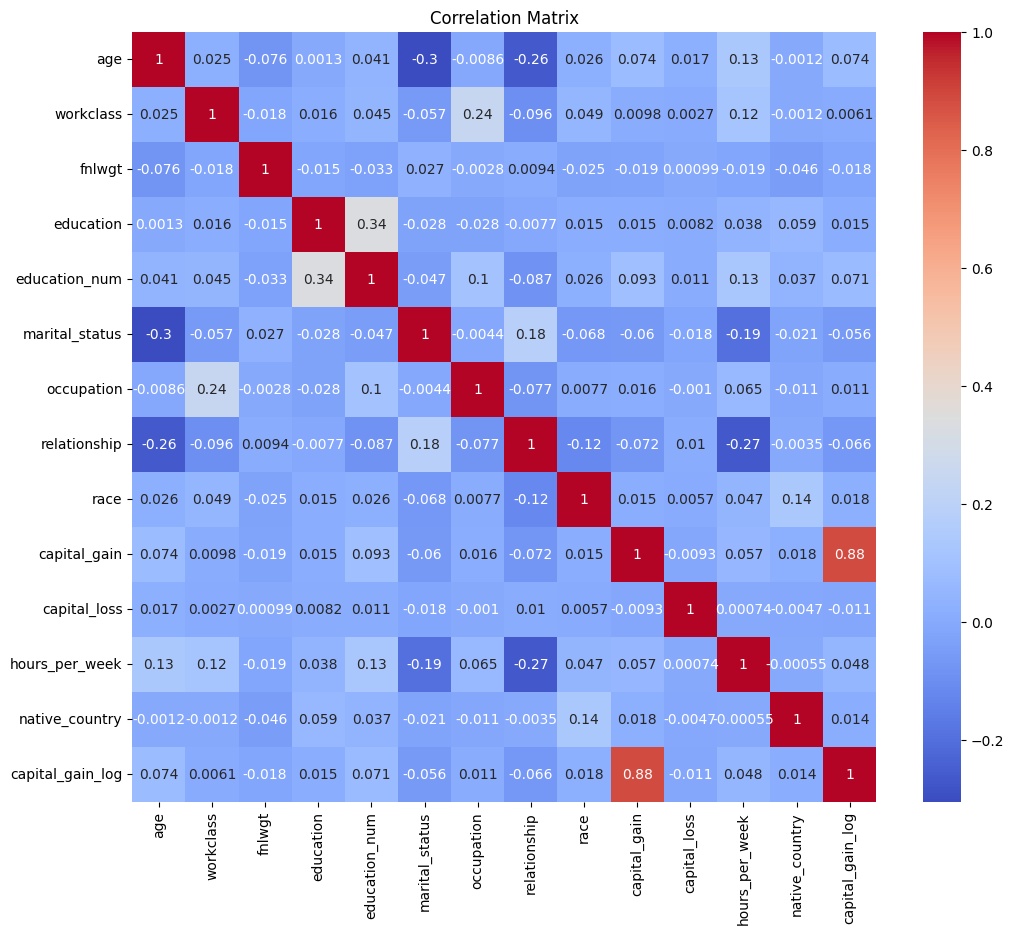

In [15]:
# Compare with Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()